## Import Libraries and Data Files

In [200]:
%run setup.ipynb

### Check CSV Files

In [201]:
# get count of null values by column for horse dataframe
horse_df.isnull().sum(axis = 0)


Horse                  0
HighestLevel           0
CDI                    0
USDFNumber             0
Sire                   1
Damsire               18
Country                8
Breeder               47
Studbook               0
InternationalTeam      0
TeamMade             878
AverageGP            613
FirstYear              0
LastYear               0
dtype: int64

In [202]:
# get count of null values by column for championship dataframe
championship_df.isnull().sum(axis = 0)

Year              0
Division          0
Horse             0
OverallPlacing    0
USDFNumber        0
OverallScore      0
dtype: int64

## Analysis of Competitive Outcomes, Young Horse Division - 2002-2020
This year range was selected because all horses that competed in the 4/5/6/ Year Old divisions in this time frame are old enough to have competed at the highest level, Grand Prix (minimum age allowed with both USEF and FEI is 8, although it is uncommon for a horse that young to be competing at that level).

In [150]:
# get number of horses over all years of the program (2002-2024)
horse_count = len(horse_df)

print(f"The total number of horses competing over all years is {horse_count}.")

The total number of horses competing over all years is 888.


In [203]:
# create a dataframe of horses that competed in the 4/5/6 year old divisions from 2002-2020
total_horses = merged_df.loc[(merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicate USDF numbers so we only count each horse once
total_horses = total_horses.drop_duplicates(subset=['USDFNumber'])

# get count of horses
total_horses_count = total_horses['USDFNumber'].count()

#print(total_horses.describe())

print(f"The total number of horses competing from 2002-2020 is {total_horses_count}.")

The total number of horses competing from 2002-2020 is 555.


### Breakdown of Young Horse Division Competitors by Highest Level of Competition Achieved

In [ ]:
# create a countplot to display the breakdown of highest level competed

# set figure size
ax = plt.subplots(figsize=(13, 10))

# set counplot options
ax = sns.countplot(
   y = 'Highest Level',
   data = total_horses,
   alpha = 0.7,
   order = total_horses['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/total_horses_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest Level Competed by Former Young Horse Division Competitors')
plt.xlabel('Count of Horses')
plt.ylabel('Highest Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/highest-level-breakdown.png')
plt.show()

### Career Length

|      |   Year | Division   | Horse                     |   OverallPlacing |   USDFNumber |   OverallScore | Highest Level    | CDI Competitor   | Sire                  | Damsire                    | Country Bred   | Breeder                               | Studbook                                                | InternationalTeam   | Team Made                                |   AverageGP |   FirstYear |   LastYear |   CareerLength |
|-----:|-------:|:-----------|:--------------------------|-----------------:|-------------:|---------------:|:-----------------|:-----------------|:----------------------|:---------------------------|:---------------|:--------------------------------------|:--------------------------------------------------------|:--------------------|:-----------------------------------------|------------:|------------:|-----------:|---------------:|
|    0 |   2002 | FEI5       | Rosabella                 |                1 |        37232 |          7.84  | Third Level 

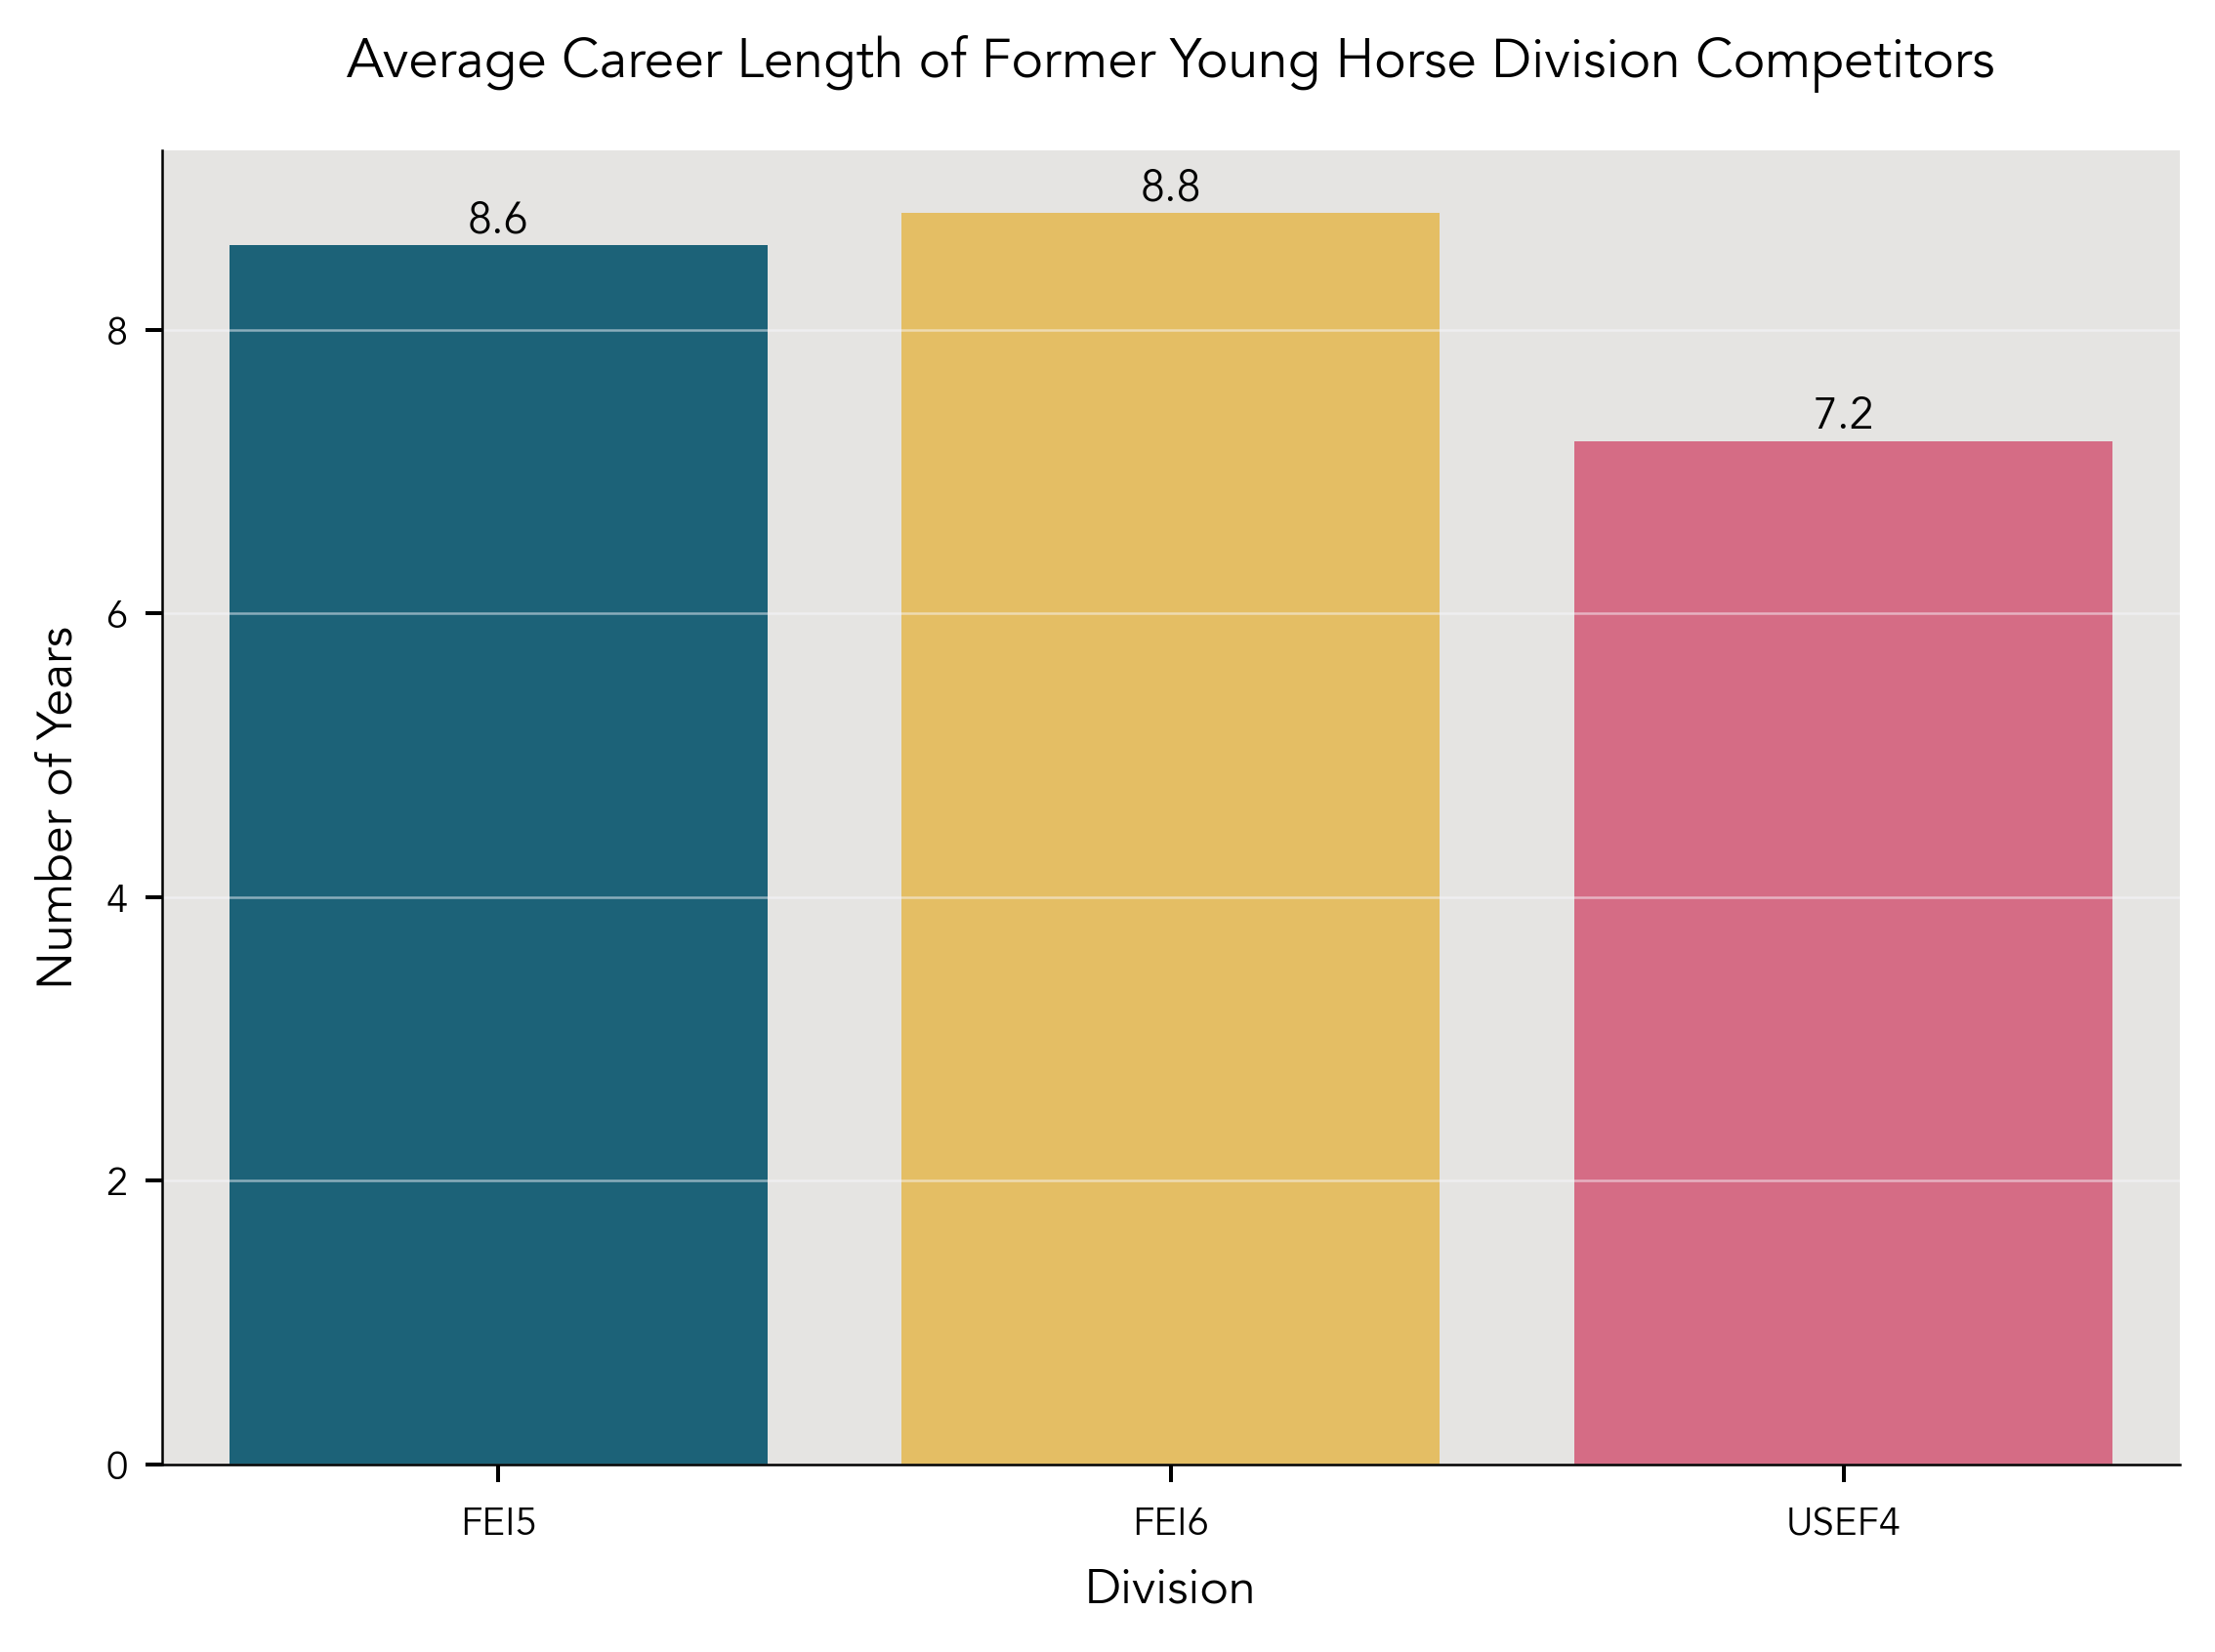

In [263]:
career_df = merged_df.loc[(merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))].copy()

career_df['CareerLength'] = career_df['LastYear'] - career_df['FirstYear'] + 1

print(career_df.to_markdown())

career_df = career_df.groupby(['Division']).agg(mean_career=('CareerLength', 'mean'))
career_df = career_df.reset_index()

ax = sns.barplot(x = 'Division',
            y = 'mean_career',
            data = career_df)

    
# add annotation for count of each division 
for p in ax.patches:
    ax.annotate("{:0,.1f}".format(p.get_height(), p.get_width()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom', fontsize=9)
    


# set title, xlabel and ylabel
plt.title('Average Career Length of Former Young Horse Division Competitors')
plt.xlabel('Division')
plt.ylabel('Number of Years')

# save and show figure
plt.tight_layout()
plt.savefig('images/yh-career-length.png')
plt.show()


### Young Horse Division Competitors and FEI (Fédération Equestre Internationale) Achievement

In [ ]:
# set a variable for the FEI levels
fei_levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges']

# get the horses that have competed at FEI 
fei_df = total_horses.loc[(total_horses['Highest Level'].isin(fei_levels))]

# count the FEI horses by USDF number
fei_count = fei_df['USDFNumber'].nunique()

# print to console
print(f"The number of horses that competed at FEI is {fei_count}.")

In [ ]:
# get the percentage of horses that have competed at FEI 
fei_percentage = (fei_count / total_horses_count) * 100

# round the percentage
fei_percentage = round(fei_percentage, 2)

# print to console
print(f"The percentage of horses that competed at FEI is {fei_percentage}%.")

In [ ]:
#  create a countplot to visualize FEI vs non-FEI horse data

# set variables for level groupings
fei = {'Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges'}
usef = {'Training Level', 'First Level', 'Second Level', 'Third Level', 'Fourth Level', 'FEI Junior'}
yh = {'USEF 4 Year Old', 'FEI 5 Year Old', 'FEI 6 Year Old', 'FEI 7 Year Old'}
dh = {'Developing Prix St. Georges', 'Developing Grand Prix'}

# new column with result of function  
total_horses['LevelGroup'] = total_horses['Highest Level'].apply(level_sort)

# set options for countplot
ax = sns.countplot(
   x = 'LevelGroup',
   data = total_horses,
   palette = ['#0d6a87', '#f9c74f', '#e75a7c'],
   alpha = .7,
   order = total_horses['LevelGroup'].value_counts().index
)

# add annotation for count and percentage of each level grouping 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/total_horses_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('FEI vs Non-FEI Former Young Horse Division Competitors')
plt.xlabel('Highest Level Competed')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/fei-vs-non-fei.png')
plt.show()

### Breakdown of Highest FEI Level Achieved by Young Horse Division Competitors


In [ ]:
# create a countplot to display the breakdown of highest FEI level competed

# get the count of horses at each FEI level
fei_level_groups = total_horses[(total_horses['Highest Level'].isin(fei_levels))]

# set figure size
ax = plt.subplots(figsize=(11, 5))

# set counplot options
ax = sns.countplot(
   y = 'Highest Level',
   data = fei_level_groups,
   alpha = 0.7,
   order = fei_level_groups['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/fei_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest FEI Level Competed by Former Young Horse Division Competitors')
plt.xlabel('Count of Horses')
plt.ylabel('Highest FEI Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-level-breakdown.png')
plt.show()

### Young Horse Division Competitors and CDI (Concours de Dressage International) Competition


In [ ]:
# get the horses that have competed in at least one CDI (any level other than Young Horse divisions)
cdi_horses = total_horses.loc[(total_horses['CDI Competitor'] == 'Yes')]

# count the CDI horses by USDF number
cdi_count = cdi_horses['USDFNumber'].nunique()

print(f"The number of CDI competitors is {cdi_count}.")

In [ ]:
# get the overall percentage of horses that competed in at least one CDI 
cdi_percentage = (cdi_count / fei_count) * 100

# round the percentage
cdi_percentage = round(cdi_percentage, 2)

# print to console
print(f"The percentage of CDI competitors is {cdi_percentage}%")

In [ ]:
#  create a countplot to visualize CDI vs non-CDI horse data

# set options for countplot
ax = sns.countplot(
   x = 'CDI Competitor',
   data = fei_df,
   palette = ['#0d6a87', '#b7b8b8'],
   alpha = .7,
   order = fei_df['CDI Competitor'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('CDI vs Non-CDI Former Young Horse Division Competitors')
plt.xlabel('CDI Competitor Status')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/cdi-competitors.png')
plt.show()

### Grand Prix Competitor Statistics

In [162]:
# get the horses that competed to Grand Prix 
grandprix_horses = total_horses.loc[(total_horses['Highest Level'] == 'Grand Prix')].copy()

# count the Grand Prix horses by USDF number
grandprix_horses_count = grandprix_horses['USDFNumber'].nunique()

# print to console
print(f"The number of Grand Prix horses is {grandprix_horses_count}.")

The number of Grand Prix horses is 147.


In [163]:
# get the percentage of horses that competed at Grand Prix
grand_prix_percentage = (grandprix_horses_count / total_horses_count) * 100

# round the percentage
grand_prix_percentage = round(grand_prix_percentage, 2)

# print to console
print(f"The percentage of Grand Prix horses is {grand_prix_percentage}%.")

The percentage of Grand Prix horses is 26.49%.


In [164]:
grandprix_horses['AverageGP'] = grandprix_horses['AverageGP'].astype(float)

grandprix_horses.dtypes

Year                   int64
Division              object
Horse                 object
OverallPlacing         int64
USDFNumber             int64
OverallScore         float64
Highest Level         object
CDI Competitor        object
Sire                  object
Damsire               object
Country Bred          object
Breeder               object
Studbook              object
InternationalTeam     object
Team Made             object
AverageGP            float64
dtype: object

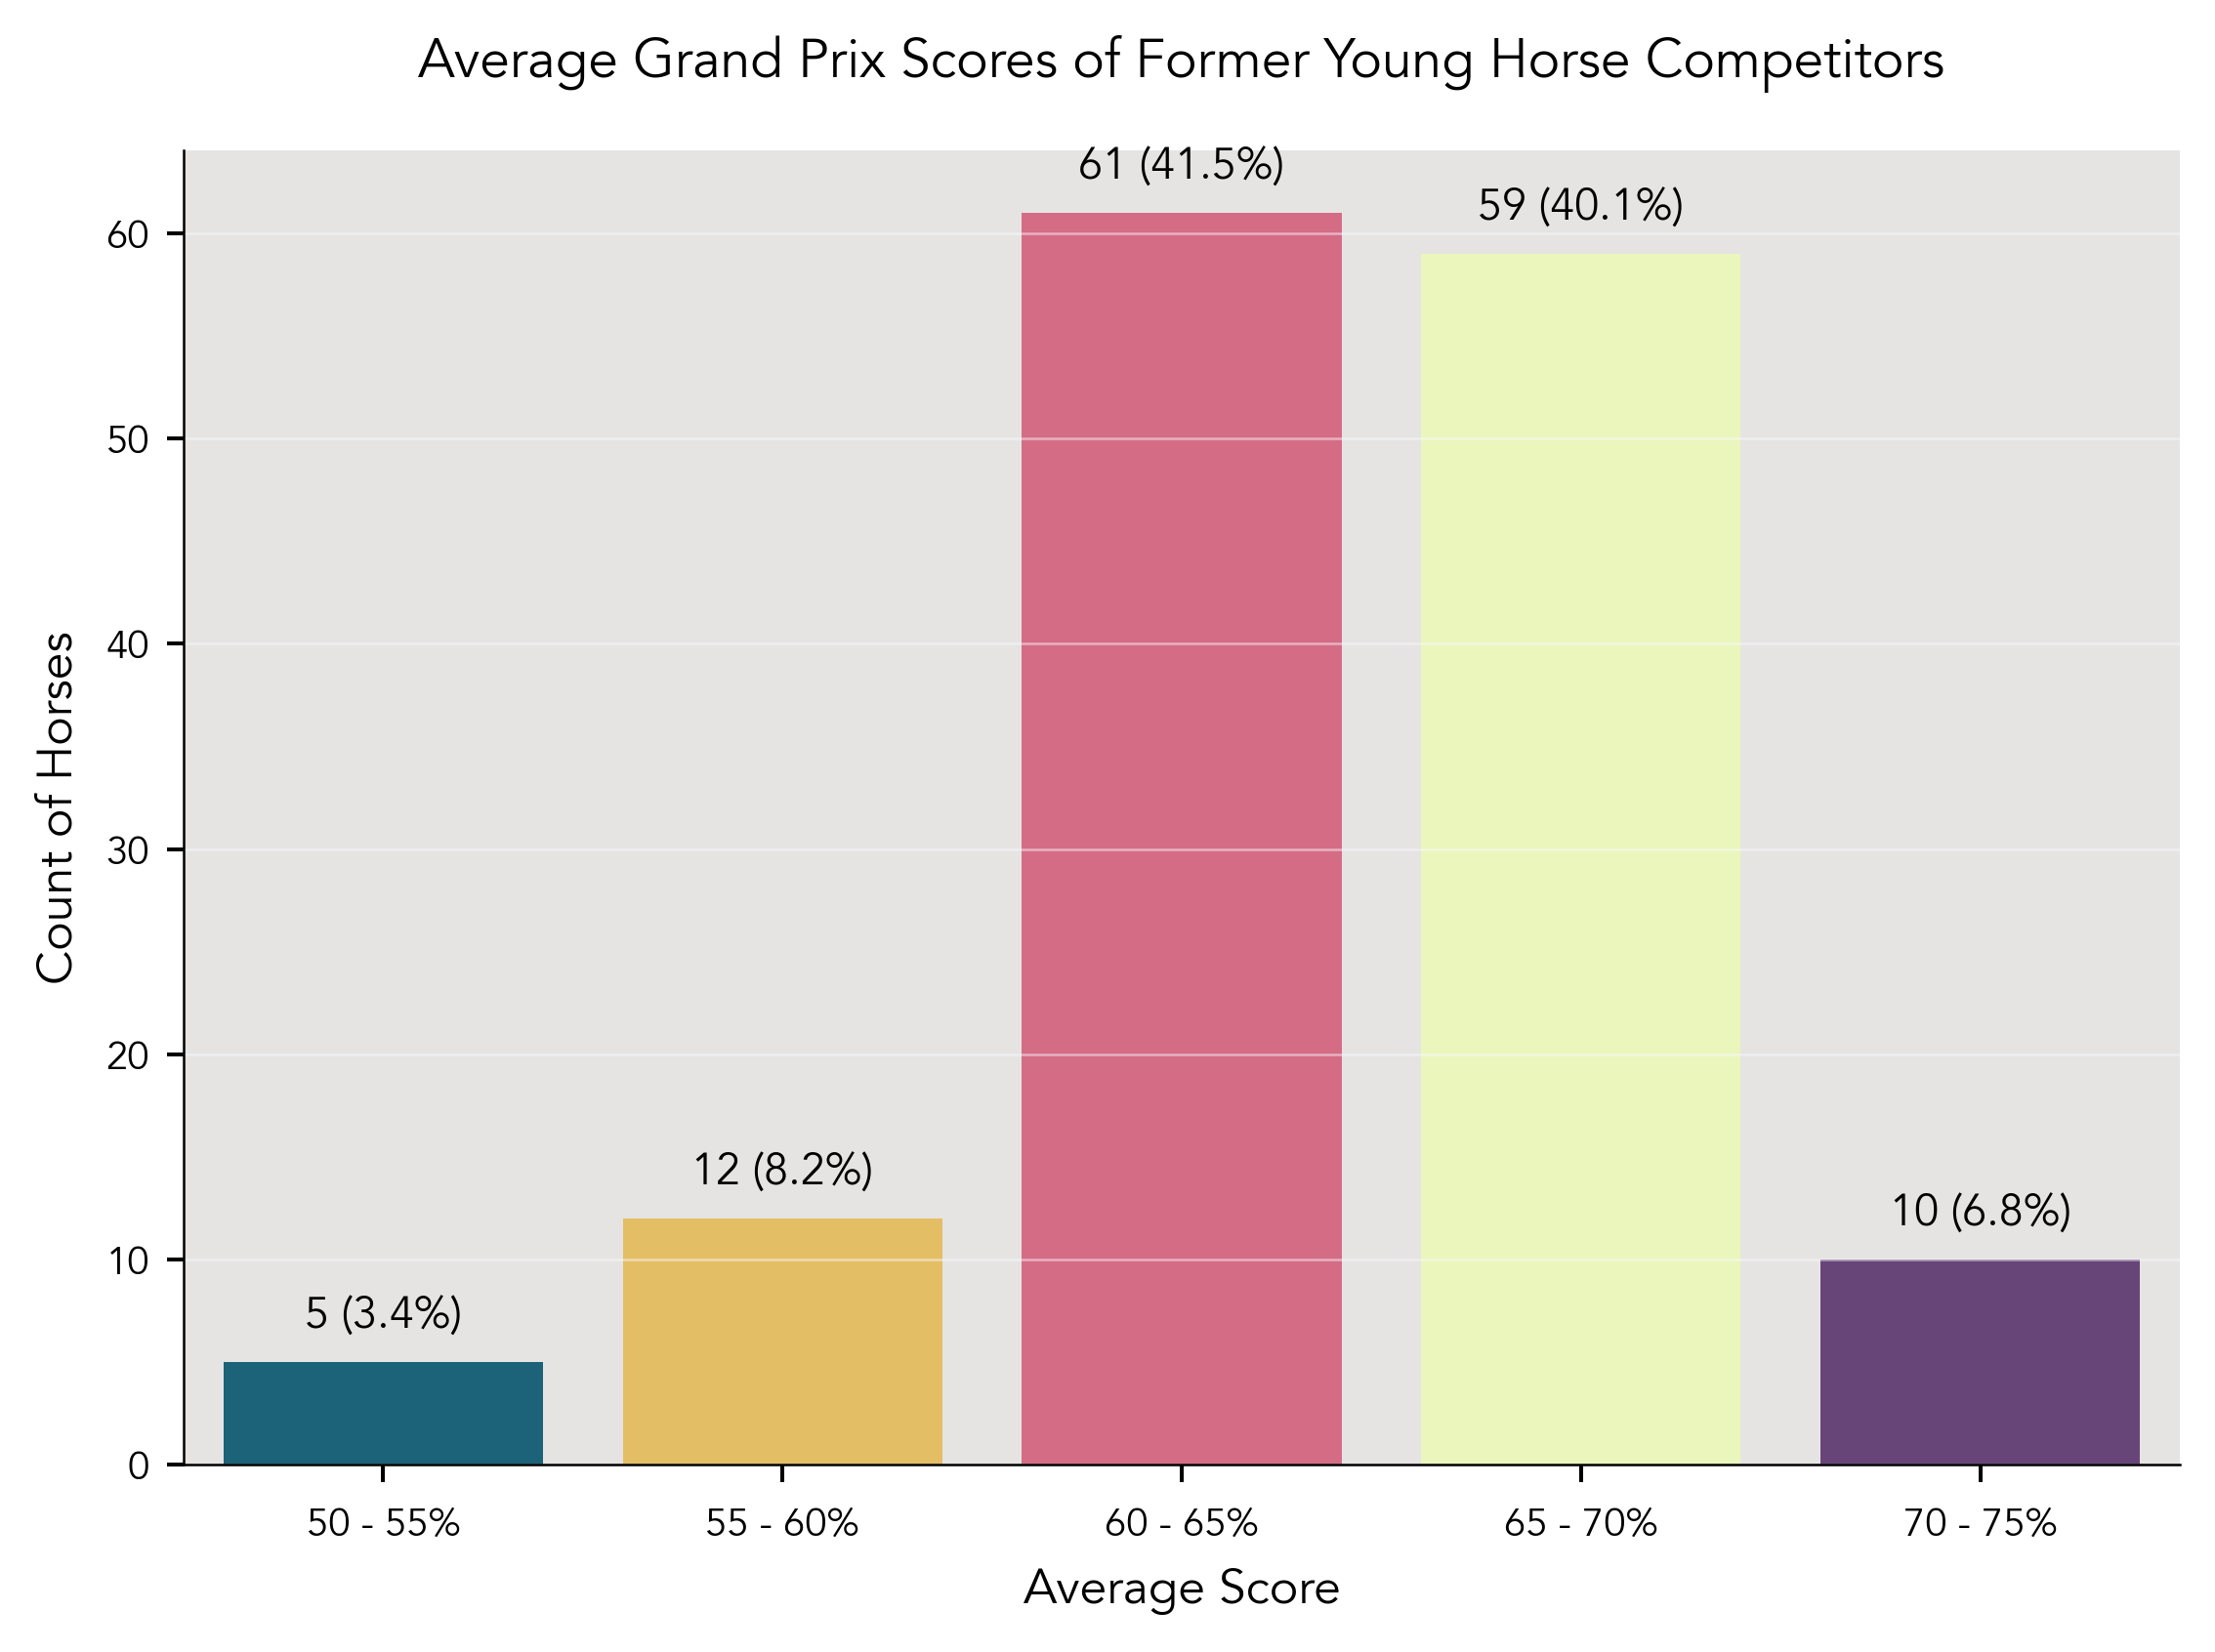

In [190]:
# create countplot of average Grand Prix scores of former Young Horse competitors

# create labels
labels = ['50 - 55%', '55 - 60%', '60 - 65%', '65 - 70%', '70 - 75%']

# cut bins
grandprix_horses['bin'] = pd.cut(grandprix_horses['AverageGP'], bins=range(50,76,5), labels=labels)

# set up countplot
ax = sns.countplot(x='bin', data=grandprix_horses)

# add annotation for count and percentage 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/grandprix_horses_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=9)

# set xticks, xlabel, and title
ax.set_title('Average Grand Prix Scores of Former Young Horse Competitors')
ax.set_xlabel('Average Score')
ax.set_ylabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/yh-gp-average-score.png')
plt.show()

### Young Horse Division International Team Horse Statistics

In [188]:
# select the horses that went on to make an international team (Pan American, World Equestrian, or Olympic Games) 
team_df = merged_df[(merged_df['Year'] <= 2020) & (merged_df['InternationalTeam'] == 'Yes') &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
team_df = team_df.drop_duplicates(subset='USDFNumber')

# drop unnecessary columns
team_df = team_df.drop(columns =['Year', 'Division', 'OverallPlacing', 'OverallScore','CDI Competitor', 'USDFNumber', 'Highest Level', 'InternationalTeam'])

# show dataframe
team_df

# print to markdown
#print(team_df.to_markdown())

,Horse,Sire,Damsire,Country Bred,Breeder,Studbook,Team Made,AverageGP
166,Grandioso,Grosso Z,Palisandergrund,Germany,Willi Hillebrecht,Westfalen,Pan American Games,NaN
168,Sancette,Sandro Hit,Contender,Germany,Dietrich Meyer,Hanoverian,Olympic Games and World Equestrian Games,65.071
238,Selten HW,Sandro Hit,Hohenstein,USA,Irene Hoeflich-Wiederhold,Hanoverian,Olympic Games and World Equestrian Games,71.1
399,Sanceo,San Remo,Ramiro's Son II,Germany,Gerhard Dustmann,Hanoverian,Olympic Games and Pan American Games,73.21
633,Lucky Strike,Lord Laurie,His Highness,Germany,Monika Hartwitch,Hanoverian,Pan American Games,NaN


In [189]:
# get the percentage of Young Horse competitors that made an international team

# get the count of team horses
team_count = len(team_df)

# calculate the percentage
team_percentage = (team_count / total_horses_count) * 100

# round the percentage
team_percentage = round(team_percentage, 1)

# print to console
print(f"The percentage of horses that made an international team is {team_percentage}%")

The percentage of horses that made an international team is 0.9%


### Summary Statistics for Competitive Outcomes

In [ ]:
# create summary table of overall horse statistics

horse_summary = pd.DataFrame({"Total Horses": [total_horses_count], "Total FEI Horses": fei_count,
                            "Percentage of FEI Horses": fei_percentage, 
                            "Total CDI Horses": cdi_count,
                            "Percentage of CDI Horses": cdi_percentage,
                            "Total Grand Prix Horses": grandprix_horses_count,
                            "Percentage of Grand Prix Horses": grand_prix_percentage,
                            "Total Team Horses": team_count,
                            "Percentage of Team Horses": team_percentage})

# add formatting 
horse_summary["Percentage of FEI Horses"] = horse_summary["Percentage of FEI Horses"].map("{:.2f}%".format)
horse_summary["Percentage of CDI Horses"] = horse_summary["Percentage of CDI Horses"].map("{:.2f}%".format)
horse_summary["Percentage of Grand Prix Horses"] = horse_summary["Percentage of Grand Prix Horses"].map("{:.2f}%".format)
horse_summary["Percentage of Team Horses"] = horse_summary["Percentage of Team Horses"].map("{:.2f}%".format)


# show dataframe
horse_summary

### Highest Level Achieved by Placing

In [ ]:
# get the number of FEI horses that placed in the top 10 of their division at the championships 

# top placing variable for places 1-10
top_placing = [1,2,3,4,5,6,7,8,9,10]

# get FEI horses placing in the top ten
top_ten = merged_df[(merged_df['OverallPlacing'].isin(top_placing)) & (merged_df['Highest Level'].isin(fei_levels))
                          & (merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
top_ten = top_ten.drop_duplicates(subset='USDFNumber')

# count the horses that placed in the top ten
top_ten_count = top_ten['USDFNumber'].count()

# print to console
print(f"{top_ten_count} FEI horses placed in the top 10 of their division at championships.")




In [ ]:
# get the percentage of FEI horses in the top ten of their division

# calculate the percentage
top_ten_percentage = (top_ten_count / fei_count) * 100

# round the percentage
top_ten_percentage = round(top_ten_percentage, 2)

# print to console
print(f"The percentage of FEI horses placing in the top ten of their division at championships is {top_ten_percentage}%.")

In [ ]:
# get the number of FEI horses that placed in the bottom 10 of their division 

# bottom placing variable for places out of the top ten
lower_placing = [11,12,13,14,15,16,17,18,19,20]

# get FEI horses placing in the bottom ten
bottom_ten = merged_df[(merged_df['OverallPlacing'].isin(lower_placing)) & (merged_df['Highest Level'].isin(fei_levels))
                          & (merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
bottom_ten = bottom_ten.drop_duplicates(subset='USDFNumber')

# get count of bottom ten by USDF number
bottom_ten_count = bottom_ten['USDFNumber'].count()

# print to console
print(f"{bottom_ten_count} FEI horses placed in the bottom 10 of their division at championships.")


In [ ]:
# get the percentage of FEI horses in the top ten of their division

# calculate the percentage
bottom_ten_percentage = (bottom_ten_count / fei_count) * 100

# round the percentage
bottom_ten_percentage = round(bottom_ten_percentage, 2)

# print to console
print(f"The percentage of FEI horses placing in the bottom ten of their division at championships is {bottom_ten_percentage}%.")

In [ ]:
#  create a countplot to visualize the percentage of FEI horses that placed in the top ten vs bottom ten

# concatonate top ten and bottom ten dataframes
frames = [top_ten, bottom_ten]
placing_group = pd.concat(frames)


# new column with result of function  
placing_group['TopTen'] = placing_group['OverallPlacing'].apply(get_top_ten)

# sort values and drop duplicates, this way ensures if a horse placed in the top ten and lower that we keep the top ten result
placing_group = placing_group.sort_values('TopTen').drop_duplicates(subset='USDFNumber', keep='last')

# set options for countplot
ax = sns.countplot(
   x = 'TopTen',
   data = placing_group,
   palette = ['#25a18b', '#b7b8b8'],
   alpha = .7,
   order = placing_group['TopTen'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('Former Young Horse Division Competitors at FEI by Placing at Championships')
plt.xlabel('Placing')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/top-ten-vs-bottom-ten.png')
plt.show()

In [ ]:
# get the number of horses that placed in the top 3 of their division at the championships 

# top placing variable for places 1-3
top_3 = [1,2,3]

# get FEI horses placing in the top three
top_three = merged_df[(merged_df['OverallPlacing'].isin(top_3)) 
                          & (merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
top_three = top_three.drop_duplicates(subset='USDFNumber')

# count the horses that placed in the top ten
top_three_count = top_three['USDFNumber'].count()

# print to console
print(f"{top_three_count} horses placed in the top 3 of their division at championships.")

In [ ]:
# create countplot of horses placing in the top three by highest level competed

# set figure size
ax = plt.subplots(figsize=(13, 10))

# set options for countplot
ax = sns.countplot(
   y = 'Highest Level',
   data = top_three,
   #palette = color_palette,
   alpha = 0.7,
   order = top_three['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/top_three_count), (p.get_x() + p.get_width() + .25, p.get_y() + .4), ha = 'left', va = 'center', fontsize=8)

# set title, xlabel, and ylabel
plt.title('Young Horse Division Competitors in the Top Three by Highest Level Competed')
plt.xlabel('Count of Horses')
plt.ylabel('Highest Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-three-by-level.png')
plt.show()

### Grand Prix Horses by Placing

In [ ]:
# get Grand Prix horses placing in the top ten
gp_top_ten = merged_df[(merged_df['OverallPlacing'].isin(top_placing)) & (merged_df['Highest Level'] == 'Grand Prix')
                          & (merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))]

# drop duplicates by USDF number
gp_top_ten = gp_top_ten.drop_duplicates(subset='USDFNumber')

# get the count of Grand Prix horses that placed in the top ten
gp_top_ten_count = gp_top_ten['USDFNumber'].count()

# print to console
print(f"{gp_top_ten_count} Grand Prix horses placed in the top 10 of their division.")

In [ ]:
# get the percentage of horses that made it to Grand Prix that placed in the top ten of their division

# calculate the percentage
gp_top_ten_percentage = (gp_top_ten_count / grandprix_horses_count) * 100

# round the percentage
gp_top_ten_percentage = round(gp_top_ten_percentage, 2)

# print to console
print(f"The percentage of Grand Prix horses that placed in the top ten of their division is {gp_top_ten_percentage}%")

In [ ]:
# create a countplot of Grand Prix horses that placed in the top ten of their division

# get all Grand Prix horses
gp_placings = merged_df.loc[(merged_df['Highest Level'] == 'Grand Prix')
                          & (merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))].copy()


# new column with result of function  
gp_placings['TopTen'] = gp_placings['OverallPlacing'].apply(get_top_ten)

# sort values and drop duplicates, this way ensures if a horse placed in the top ten and lower that we keep the top ten result
gp_placings = gp_placings.sort_values('TopTen').drop_duplicates(subset='USDFNumber', keep='last')

# set options for countplot
ax = sns.countplot(
   x = 'TopTen',
   data = gp_placings,
   palette = ['#aaa1c8', '#b7b8b8'],
   alpha = .7,
   order = gp_placings['TopTen'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/grandprix_horses_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
plt.title('Former Young Horse Division Competitors\nat Grand Prix by Placing at Championships')
plt.xlabel('Placing')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/gp-top-ten-placing.png')
plt.show()

In [ ]:
# create a histogram of FEI horses placing in the top ten vs the bottom ten at championships by level

# set up bins and labels
placing_bins = [1, 11, 25]
placing_labels = ['Top Ten', '11 and Under']

# set up histogram
ax = sns.histplot(x='OverallPlacing', bins=placing_bins, hue='Highest Level', palette=color_palette, alpha=0.7,multiple='dodge', data=placing_group)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/top_ten_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Number of FEI Horses Placing in\nthe Top Ten vs Bottom Ten By Level')
ax.set_xlabel('Placing')
ax.set_ylabel('Count of Horses')

# set xticks and xtick labels
ax.set_xticks([5,15])
ax.set_xticklabels(placing_labels)

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-placing.png')
plt.show()



In [ ]:
# create countplot of FEI horses placing in the top ten by highest level competed

# set options for countplot
ax = sns.countplot(
   x = 'Highest Level',
   data = top_ten,
   alpha = 0.7,
   order = top_ten['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
plt.title('FEI Horses in the Top Ten by Level')
plt.ylabel('Count of Horses')
plt.xlabel('Highest Level Competed')

# rotate xticks
plt.xticks(rotation=45)

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-top-ten-by-level.png')
plt.show()

In [ ]:
# create histogram of highest level competed and overall score at championships

# set up bins 
score_bins = [5.8, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

f, ax = plt.subplots(figsize=(5, 6))

#colors = {'#ba324f', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#25a18b', '#4ba3c3', '#277da1', '#aaa1c8', '#4e598c', '#d9ed92', '#e75a7c'}

# set up histogram
ax = sns.histplot(x='OverallScore', bins=score_bins, hue='Highest Level', multiple='stack', data=fei_df,
    linewidth=0.5, alpha=0.7)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5.8,6.5,7.0,7.5,8.0,8.5,9.0,9.5])
ax.set_title('Highest Level and Overall Score')
ax.set_xlabel('Overall Score')
ax.set_ylabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-score.png')
plt.show()

In [ ]:
# create a histogram of horses at the FEI level that scored 7.45 or higher vs under 7.45

scores_df = merged_df.loc[(merged_df['Year'] <= 2020) &
                            (merged_df['Division'].str.contains('USEF4|FEI5|FEI6')) & (merged_df['Highest Level'].isin(fei_levels))].copy()


ax = plt.subplots(figsize=(11, 8))

# new column with result of function  
scores_df['ScoreRank'] = scores_df['OverallScore'].apply(check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 7.45 that we keep the higher score
scores_df = scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

# set up histogram
ax = sns.histplot(x='ScoreRank',  hue='Highest Level', alpha=0.7, multiple='dodge', linewidth=0.5, data=scores_df)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
plt.title('FEI Horses Scoring 7.45 or Over vs Scoring Under 7.45')
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-overall-score-level-breakdown.png')
plt.show()


In [ ]:
# set options for countplot
ax = sns.countplot(
   x = 'ScoreRank',
   data = scores_df,
   palette = ['#00ffee', '#b7b8b8'],
   alpha = .7,
   order = scores_df['ScoreRank'].value_counts().index
)

# add annotation for count and percentage of each score group
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/fei_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Former Young Horse Division Competitors at FEI\nScoring 7.45 or Over vs Scoring Under 7.45')
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/fei-by-overall-score.png')
plt.show()

In [ ]:
gp_scores_df = scores_df.loc[(scores_df['Highest Level'] ==  'Grand Prix')]

# set options for countplot
ax = sns.countplot(
   x = 'ScoreRank',
   data = gp_scores_df,
   palette = ['#f3722c', '#b7b8b8'],
   alpha = .7,
   order = gp_scores_df['ScoreRank'].value_counts().index
)

# add annotation for count and percentage of each score group
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/grandprix_horses_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Former Young Horse Division Competitors at Grand Prix\nScoring 7.45 or Over vs Scoring Under 7.45')
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/grand-prix-by-overall-score.png')
plt.show()

## Chi-Square Testing

#### Chi-Test for Scores and FEI Level Competition

In [ ]:
chi_test_scores_df = merged_df.loc[(merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))].copy()


# new column with result of function  
chi_test_scores_df['IsGP'] = chi_test_scores_df['Highest Level'].apply(gp_or_no)

# new column with result of function  
chi_test_scores_df['IsFEI'] = chi_test_scores_df['Highest Level'].apply(fei_or_no)

# new column with result of function  
chi_test_scores_df['ScoreRank'] = chi_test_scores_df['OverallScore'].apply(check_score)

chi_test_scores_df = chi_test_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

#chi_test_scores_df.head()

In [ ]:
# create contingency table
contingency_table = pd.crosstab(chi_test_scores_df['ScoreRank'], chi_test_scores_df['IsFEI'])

print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

#### Chi-Test for Scores and Grand Prix Level Competition

In [ ]:
# create contingency table
contingency_table = pd.crosstab(chi_test_scores_df['ScoreRank'], chi_test_scores_df['IsGP'])

print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')



#### Chi-Test for Top Ten Placing and FEI Level Competition

In [ ]:
top_placing_chi_test_df = merged_df.loc[(merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6')) & (merged_df['OverallPlacing'].isin(top_placing))]

bottom_placing_chi_test_df = merged_df.loc[(merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6')) & (merged_df['OverallPlacing'].isin(lower_placing))]

# drop duplicates by USDF number
top_placing_chi_test_df = top_placing_chi_test_df.drop_duplicates(subset='USDFNumber')

# drop duplicates by USDF number
bottom_placing_chi_test_df = bottom_placing_chi_test_df.drop_duplicates(subset='USDFNumber')

# concatonate top ten and bottom ten dataframes
frames = [top_placing_chi_test_df, bottom_placing_chi_test_df]
placing_chi_test = pd.concat(frames)

# new column with result of function  
placing_chi_test['TopTen'] = placing_chi_test['OverallPlacing'].apply(get_top_ten)

# new column with result of function  
placing_chi_test['IsGP'] = placing_chi_test['Highest Level'].apply(gp_or_no)

# sort values and drop duplicates, this way ensures if a horse placed in the top ten and lower that we keep the top ten result
placing_chi_test = placing_chi_test.sort_values('TopTen').drop_duplicates(subset='USDFNumber', keep='last')

# new column with result of function  
placing_chi_test['IsFEI'] = placing_chi_test['Highest Level'].apply(fei_or_no)

    
# new column with result of function  
placing_chi_test['TopThree'] = placing_chi_test['OverallPlacing'].apply(get_top_three)

placing_chi_test


In [ ]:
# create contingency table
contingency_table = pd.crosstab(placing_chi_test['TopTen'], placing_chi_test['IsFEI'])

# print contingency table
print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

#### Chi-Test for Top Ten Placing and Grand Prix Level Competition

In [ ]:
# create contingency table
contingency_table = pd.crosstab(placing_chi_test['TopTen'], placing_chi_test['IsGP'])

# print contingency table
print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

#### Chi-Test for Top Three Placing and FEI Level Competition

In [ ]:
# create contingency table
contingency_table = pd.crosstab(placing_chi_test['TopThree'], placing_chi_test['IsFEI'])

# print contingency table
print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

In [261]:
career_chi = merged_df.loc[(merged_df['Year'] <= 2020) &
                             (merged_df['Division'].str.contains('USEF4|FEI5|FEI6'))].copy()

career_chi['CareerLength'] = career_chi['LastYear'] - career_chi['FirstYear'] + 1

# create contingency table
contingency_table = pd.crosstab(career_chi['Division'], career_chi['CareerLength'])

# print contingency table
print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

CareerLength  1   2   3   4   5   6   7   8   9   10  ...  12  13  14  15  16  \
Division                                              ...                       
FEI5           7  14  11  13  13  23  21  28  21  18  ...  17  16   9  11   7   
FEI6           1   6  10  13  22  19  15  30  25  17  ...  15  12  14  11   3   
USEF4         19  19   9  14  18  23  17  20  19  19  ...  11   8   4   8   2   

CareerLength  17  18  19  20  23  
Division                          
FEI5           1   0   3   0   1  
FEI6           0   1   2   1   0  
USEF4          1   1   0   0   0  

[3 rows x 21 columns]
Chi-Square statistic: 55.43215753040886
P-Value: 0.05309987444614911
Degrees of Freedom: 40
Expected Frequencies: [[ 9.53617021 13.77446809 10.59574468 14.12765957 18.71914894 22.95744681
  18.71914894 27.54893617 22.95744681 19.07234043 14.83404255 15.18723404
  12.71489362  9.53617021 10.59574468  4.23829787  0.70638298  0.70638298
   1.76595745  0.35319149  0.35319149]
 [ 8.92340426 12.8893

## Bloodline and Breeding Data Analysis, 2002-2024

### Summary Statistics of Scores by Sire - Young Horse Divisions

In [ ]:
# get the scores, sire, and division over all years (2002-2024)
sire_score = merged_df[['Sire','OverallScore', 'Division']]

In [ ]:
# since the scoring for YH and DH divisions is different, we separate out the scores for YH divisions only
# we also drop low scores that are outliers due to horses completing only one half of the competition
yh_sire_score = sire_score.loc[sire_score['Division'].str.contains('USEF4|FEI5|FEI6') & (sire_score['OverallScore'] >= 5.7)]

# get count of scores by sire
yh_sire_score_counts = yh_sire_score['Sire'].value_counts().reset_index()

# create column of score counts
yh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
yh_sire_score_groups = pd.merge(yh_sire_score_counts, yh_sire_score)

# get the sires with 8 or more scores
yh_sire_score_groups = yh_sire_score_groups.loc[(yh_sire_score_groups['Score Count'] >= 10)]

# group by sire
yh_sire_score_groups = yh_sire_score_groups.groupby(["Sire"])["OverallScore"]

# get the counts
yh_sire_score_group_count = yh_sire_score_groups.count()


# create a dataframe of summary statistics for the young horse divisions over all years
yh_sire_score_summary = pd.DataFrame({"Number of Scores": yh_sire_score_group_count,
                           "Mean Score": yh_sire_score_groups.mean(),
                           "Median Score": yh_sire_score_groups.median(),
                           "Standard Deviation": yh_sire_score_groups.std(),
                           "Variance": yh_sire_score_groups.var()}) 

# print to markdown
print(yh_sire_score_summary.to_markdown())

### Summary Statistics of Scores by Sire - Developing Horse Divisions

In [ ]:
# since the scoring for YH and DH divisions is different, we separate out the scores for DH divisions only
# we also drop low scores that are outliers due to horses completing only one half of the competition
dh_sire_score = sire_score.loc[sire_score['Division'].str.contains('DHPSG|DHGP') & (sire_score['OverallScore'] >= 45)]
# get count of scores by sire
dh_sire_score_counts = dh_sire_score['Sire'].value_counts().reset_index()
# add column of score counts
dh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
dh_sire_score_groups = pd.merge(dh_sire_score_counts, dh_sire_score)

# get the sires with 8 or more scores
dh_sire_score_groups = dh_sire_score_groups.loc[(dh_sire_score_groups['Score Count'] >= 6)]

# group by sire
dh_sire_score_groups = dh_sire_score_groups.groupby(["Sire"])["OverallScore"]

# get the counts
dh_sire_score_group_count = dh_sire_score_groups.count()


# create a dataframe of summary statistics for all divisions over all years
dh_sire_score_summary = pd.DataFrame({"Number of Scores": dh_sire_score_group_count,
                           "Mean Score": dh_sire_score_groups.mean(),
                           "Median Score": dh_sire_score_groups.median(),
                           "Standard Deviation": dh_sire_score_groups.std(),
                           "Variance": dh_sire_score_groups.var()}) 

# print to markdown
print(dh_sire_score_summary.to_markdown())

### Score Distribution by Sire - Young Horse Divisions

In [ ]:
# select the scores for the YH divisions where there are 10 or more scores for each sire
yh_sire_scores = sire_score.loc[sire_score['Division'].str.contains('USEF4|FEI5|FEI6') & (sire_score['OverallScore'] >= 5.7)]
# get count of scores by sire
yh_sire_score_counts = yh_sire_scores['Sire'].value_counts().reset_index()
# create column of score counts
yh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
yh_sire_scores= pd.merge(yh_sire_score_counts, yh_sire_scores)

# get the sires with 10 or more scores
yh_sire_scores = yh_sire_scores.loc[(yh_sire_scores['Score Count'] >= 10)]



In [ ]:
# create histogram of scores by sire for the Young Horse divisions

# set up bins 
score_bins = [5.8, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

f, ax = plt.subplots(figsize=(6, 7))

colors = {'#ba324f', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#25a18b', '#4ba3c3', '#277da1', '#aaa1c8', '#4e598c', '#d9ed92', '#e75a7c'}

# set up histogram
ax = sns.histplot(x='OverallScore', bins=score_bins, hue='Sire', palette=colors, multiple='stack', data=yh_sire_scores,
    linewidth=0.5, alpha=0.7)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5.8,6.5,7.0,7.5,8.0,8.5,9.0,9.5])
ax.set_title('Young Horse Divisions Score Distribution by Sire')
ax.set_xlabel('Overall Score')
ax.set_ylabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/yh-score-by-sire.png')
plt.show()





### Score Distribution by Sire - Developing Horse Divisions

In [ ]:
# select the scores for the DH divisions where there are 5 or more scores per sire
dh_sire_scores = sire_score.loc[sire_score['Division'].str.contains('DHPSG|DHGP') & (sire_score['OverallScore'] >= 45)]
# get count of scores by sire
dh_sire_score_counts = dh_sire_scores['Sire'].value_counts().reset_index()
# create column of score counts
dh_sire_score_counts.columns = ['Sire', 'Score Count']

# merge the dataframes
dh_sire_scores= pd.merge(dh_sire_score_counts, dh_sire_scores)

# get the sires with 6 or more scores
dh_sire_scores = dh_sire_scores.loc[(dh_sire_scores['Score Count'] >= 6)]



In [ ]:
# create histogram of scores by sire for Developing Horse divisions

# set up bins 
score_bins = [60, 65, 70, 75]

f, ax = plt.subplots(figsize=(6, 7))

# set up histogram
ax = sns.histplot(x='OverallScore', bins=score_bins, hue='Sire', palette=colors, alpha=0.7, multiple='stack', data=dh_sire_scores,
    linewidth=.5)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([60,65,70,75])
ax.set_title('Developing Horse Divisions Score Distribution by Sire')
ax.set_ylabel('Count of Horses')
ax.set_xlabel('Overall Score')

# show and save figure
plt.tight_layout()
plt.savefig('images/dh-score-by-sire.png')
plt.show()





### Distribution of Competitors by Country Bred

In [ ]:
# get the number of horses bred in the USA that competed in the years 2002-2024
usa_count = horse_df[(horse_df['Country'] == 'USA')].count()['USDFNumber']

# print to console
print(f"{usa_count} horses were bred in the USA.")

In [ ]:
# group by country bred and get count of horses for each country
country_groups = horse_df['Country'].value_counts().reset_index()

# set up columns for country and count
country_groups.columns = ['Country', 'Count of Horses']

# print to markdown
#print(country_groups.to_markdown())




|    | Country       |   Count of Horses |
|---:|:--------------|------------------:|
|  1 | USA           |               328 |
|  2 | Germany       |               311 |
|  3 | Netherlands   |               173 |
|  4 | Denmark       |                29 |
|  5 | Belgium       |                 8 |
|  6 | Canada        |                 7 |
|  7 | Norway        |                 5 |
|  8 | Spain         |                 5 |
|  9 | Great Britain |                 5 |
| 10 | Sweden        |                 2 |
| 11 | Italy         |                 1 |
| 12 | Colombia      |                 1 |
| 13 | Australia     |                 1 |
| 14 | Portugal      |                 1 |
| 15 | Brazil        |                 1 |
| 16 | France        |                 1 |
| 17 | Ukraine       |                 1 |

In [ ]:
# get the percentage of horses bred in the USA

# get length of horse dataframe 
all_horses = len(horse_df)

# calculate percentage
usa_percentage = (usa_count / all_horses) * 100

# round the percentage
usa_percentage = round(usa_percentage, 2)

# print to console
print(f"The percentage of horses bred in the USA is {usa_percentage}%.")

In [ ]:
# create a bar chart of horses by country bred
ax = sns.countplot(
   y = 'Country',
   data = horse_df,
   alpha= 0.7,
   order= horse_df['Country'].value_counts().iloc[:10].index
)


# add annotation for count and percentage of horses bred in each country
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/all_horses), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center', fontsize=7)

# set title and xlabel
plt.title('Horses by Country Bred')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/horses-by-country.png')
plt.show()

### Top Ten Sires of Championship Competitors

In [ ]:
# get the top ten sires by count off offspring (showing 15 horses, as there are multiple horses tied for various placings)
top_sires = horse_df['Sire'].value_counts().head(13).reset_index()

# rename columns
top_sires.columns = ['Sire', 'Count of Horses']

# print to markdown 
#print(top_sires.to_markdown())


|    | Sire             |   Count of Horses |
|---:|:-----------------|------------------:|
|  1 | Sandro Hit       |                24 |
|  2 | Furstenball      |                19 |
|  3 | Sir Donnerhall I |                18 |
|  4 | Jazz             |                13 |
|  5 | Rotspon          |                12 |
|  6 | Florestan I      |                12 |
|  7 | Fidertanz        |                12 |
|  8 | Hotline          |                10 |
|  9 | Grand Galaxy Win |                10 |
| 10 | Florencio I      |                 9 |
| 11 | Belissimo M      |                 9 |
| 12 | Secret           |                 9 |
| 13 | Sir Sinclair     |                 9 |

In [ ]:
# set countplot options
sire_chart = sns.countplot(
   y = 'Sire',
   data = horse_df,
   alpha = 0.7,
   order = horse_df['Sire'].value_counts().iloc[:13].index
)

# add count of offspring to bars
sire_chart.bar_label(sire_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top Ten Sires of Championship Competitors')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-10-sires.png')
plt.show()

### Top Ten Sires of Grand Prix Horses

In [ ]:
# get the top ten sires of Grand Prix horses by count off offspring

# select all Grand Prix horses
gp_sires = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# select the top 15 sires, as there are multiple horses tied for various placings, and create column for offspring count
gp_sires = gp_sires['Sire'].value_counts().head(10).reset_index()

# rename columns
gp_sires.columns = ['Sire', 'Count of Horses']

# print to markdown
#print(gp_sires.to_markdown())

|    | Sire             |   Count of Horses |
|---:|:-----------------|------------------:|
|  1 | Sandro Hit       |                11 |
|  2 | Sir Donnerhall I |                 9 |
|  3 | Jazz             |                 8 |
|  4 | Fidertanz        |                 6 |
|  5 | Florestan I      |                 5 |
|  6 | Belissimo M      |                 5 |
|  7 | Florencio I      |                 5 |
|  8 | Rotspon          |                 4 |
|  9 | Hotline          |                 4 |
| 10 | Quaterback       |                 4 |



In [ ]:
# create countplot of top Grand Prix sires

# get all horses that competed at Grand Prix
gp_sire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# set up figure options
gp_sire_chart = sns.countplot(
   y = gp_sire_group['Sire'],
   data = gp_sire_group,
   alpha = 0.7,
   order = gp_sire_group['Sire'].value_counts().iloc[:10].index
)

# add count of offspring to bars
gp_sire_chart.bar_label(gp_sire_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top Sires of Grand Prix Horses')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-gp-sires.png')
plt.show()

### Percentage of Grand Prix Horses by Sire

In [ ]:

# get value counts of offspring for top 50 sires and add column for count
sires = horse_df['Sire'].value_counts().iloc[:50].reset_index()

#rename columns
sires.columns = ['Sire', 'Offspring']

# get all horses competing at Grand Prix
gp_sire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# get value counts of offspring for top 30 sires and add column for count
gp_sire_group = gp_sire_group['Sire'].value_counts().iloc[:50].reset_index()

#rename columns
gp_sire_group.columns = ['Sire', 'GP Offspring']

# merge columns to create sire dataframe
sire_df = pd.merge(sires, gp_sire_group)

# empty list to hold percentage values
percentage = []

#loop through the sire dataframe, calculate percentage of GP offspring and append to percentage list
for i in sire_df.index:
        sire = sire_df['Sire'][i]
        gp_percentage = (sire_df['GP Offspring'][i]) / (sire_df['Offspring'][i]) * 100
        percentage.append(gp_percentage)
    

# create new column from list of percentages
sire_df['GP Percentage'] = percentage

# convert column datatype for formatting
sire_df['GP Percentage'] = pd.to_numeric(sire_df['GP Percentage'], errors='coerce')

# format percentages
#sire_df['GP Percentage'] = sire_df['GP Percentage'].map('{:.1f}%'.format)

# reduce the dataframe to sires with at least 5 offspring
sire_df = sire_df.loc[(sire_df['Offspring'] >= 9)]

# sort dataframe by percentage
sire_df = sire_df.sort_values(by=['GP Percentage'], ascending=False).reset_index(drop=False)

#print(sire_df.to_markdown())       
                                

|    |       Sire       |    Offspring   |  GP Offspring |   GP Percentage |
|---:|-----------------:|---------------:|--------------:|----------------:|
| 1  | Jazz             |             13 |             8 |         61.5%   |
| 2  | Florencio I      |              9 |             5 |         55.6%   |
| 3  | Belissimo M      |              9 |             5 |         55.6%   |
| 4  | Sir Donnerhall I |             18 |             9 |         50.0%   |
| 5  | Fidertanz        |             12 |             6 |         50.0%   |
| 6  | Sandro Hit       |             24 |            11 |         45.8%   |
| 7  | Florestan I      |             12 |             5 |         41.7%   |
| 8  | Hotline          |             10 |             4 |         40.0%   |
| 9  | Rotspon          |             12 |             4 |         33.3%   |
| 10 | Sir Sinclair     |              9 |             3 |         33.3%   |
| 11 | Furstenball      |             19 |             3 |         15.8%   |

In [ ]:
ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(y='Sire', x='GP Percentage', data=sire_df, alpha=.7)

# loop through dataframe and add percentage at the end of each bar
for i in sire_df.index:
        percent = sire_df['GP Percentage'][i]
        total_offspring = sire_df['Offspring'][i]
        gp_offspring = sire_df['GP Offspring'][i]
        plt.text(percent + 3.5, i, f"({gp_offspring}/{total_offspring}) {percent:.1f}%", 
         color='black', fontsize=8, ha="center", va='center')
    

# set title, xlabel, and ylabel
ax.set_title('Percentage of Grand Prix Horses by Sire')
ax.set_ylabel('Sire')
ax.set_xlabel('Percentage')

# save and show figure
plt.tight_layout()
plt.savefig('images/gp-sire-percentage.png')
plt.show()


### Top Ten Damsires of Championship Competitors

In [ ]:
# get the top ten damsires represented over all years (2002 - 2023) and add column for count
top_damsires = horse_df['Damsire'].value_counts().head(10).reset_index()
#rename columns
top_damsires.columns = ['Damsire', 'Count of Horses']

#print(top_damsires.to_markdown())

|    | Damsire          |   Count of Horses |
|---:|:-----------------|------------------:|
|  1 | Rubinstein       |                25 |
|  2 | De Niro          |                20 |
|  3 | Sandro Hit       |                20 |
|  4 | Rotspon          |                16 |
|  5 | Jazz             |                16 |
|  6 | Weltmeyer        |                14 |
|  7 | Ferro            |                14 |
|  8 | Sir Donnerhall I |                13 |
|  9 | Rohdiamant       |                11 |
| 10 | Krack C          |                11 |

In [ ]:
# create bar chart of top 10 damsires

# set options for countplot
damsire_chart = sns.countplot(
   y = 'Damsire',
   data = horse_df,
   alpha = 0.7,
   order = horse_df['Damsire'].value_counts().iloc[:10].index
)

# add count of offspring to bars
damsire_chart.bar_label(damsire_chart.containers[0], padding=4)

# set title, xlable, and ylabel
plt.title('Top 10 Damsires of Championship Competitors')
plt.xlabel('Count of Horses')
plt.ylabel('Damsire')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-10-damsires.png')
plt.show()

### Top Ten Damsires of Grand Prix Horses

In [ ]:
# get the top ten damsires of Grand Prix horses by count of offspring

# get all Grand Prix horses
gp_damsires = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# get the top ten damsires 
gp_damsires = gp_damsires['Damsire'].value_counts().head(10).reset_index()

# rename columns for markdown table
gp_damsires.columns = ['Damsire', 'Count of Horses']

# print to markdown
#print(gp_damsires.to_markdown())

|    | Damsire        |   Count of Horses |
|---:|:---------------|------------------:|
|  1 | De Niro        |                 8 |
|  2 | Rubinstein     |                 6 |
|  3 | Rotspon        |                 5 |
|  4 | Ferro          |                 5 |
|  5 | Weltmeyer      |                 5 |
|  6 | Brentano II    |                 5 |
|  7 | Jazz           |                 4 |
|  8 | Rohdiamant     |                 4 |
|  9 | Wolkenstein II |                 4 |
| 10 | Sandro Hit     |                 4 |

In [ ]:
# create bar chart of top ten damsires of Grand Prix horses

# get all horses that have competed to Grand Prix
gp_damsire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# set options for the countplot
gp_damsire_chart = sns.countplot(
   y = gp_damsire_group['Damsire'],
   data = gp_damsire_group,
   alpha = .7,
   order = gp_damsire_group['Damsire'].value_counts().iloc[:10].index
)

# add labels for bars
gp_damsire_chart.bar_label(gp_damsire_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top 10 Damsires of Grand Prix Horses')
plt.xlabel('Count of Horses')

# save and show figure
plt.tight_layout()
plt.savefig('images/top-gp-damsires.png')
plt.show()

### Percentage of Grand Prix Horses by Damsire

In [ ]:
# get value counts of offspring for top 20 damsires and add column for count
damsires = horse_df['Damsire'].value_counts().iloc[:20].reset_index()

#rename columns
damsires.columns = ['Damsire', 'Offspring']

# get all horses competing at Grand Prix
gp_damsire_group = horse_df.loc[(horse_df['HighestLevel'] == 'Grand Prix')]

# get value counts of offspring for top 20 sires and add column for count
gp_damsire_group = gp_damsire_group['Damsire'].value_counts().iloc[:20].reset_index()

#rename columns
gp_damsire_group.columns = ['Damsire', 'GP Offspring']

# merge columns to create damsire dataframe
damsire_df = pd.merge(damsires, gp_damsire_group)

# empty list to hold percentage values
percentage = []

#loop through the damsire dataframe, calculate percentage of GP offspring and append to percentage list
for i in damsire_df.index:
        damsire = damsire_df['Damsire'][i]
        gp_percentage = (damsire_df['GP Offspring'][i]) / (damsire_df['Offspring'][i]) * 100
        percentage.append(gp_percentage)
    

# create new column from list of percentages
damsire_df['GP Percentage'] = percentage

# convert column datatype for formatting
damsire_df['GP Percentage'] = pd.to_numeric(damsire_df['GP Percentage'], errors='coerce')

# format percentages
#damsire_df['GP Percentage'] = damsire_df['GP Percentage'].map('{:.1f}%'.format)

# reduce the dataframe to damsires with at least 5 offspring
damsire_df = damsire_df.loc[(damsire_df['Offspring'] >= 10)]

damsire_df = damsire_df.sort_values(by=['GP Percentage'], ascending=False).reset_index(drop=False)

#print(damsire_df.to_markdown())

|    | Damsire    |   Offspring |   GP Offspring | GP Percentage   |
|----|:-----------|------------:|---------------:|:----------------|
|  1 | De Niro    |          20 |              8 | 40.0%           |
|  2 | Rohdiamant |          11 |              4 | 36.4%           |
|  3 | Weltmeyer  |          14 |              5 | 35.7%           |
|  4 | Ferro      |          14 |              5 | 35.7%           |
|  5 | Rotspon    |          16 |              5 | 31.2%           |
|  6 | Romanov    |          10 |              3 | 30.0%           |
|  7 | Donnerhall |          10 |              3 | 30.0%           |
|  8 | Jazz       |          16 |              4 | 25.0%           |
|  9 | Rubinstein |          25 |              6 | 24.0%           |
| 10 | Sandro Hit |          20 |              4 | 20.0%           |

In [ ]:
ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(y='Damsire', x='GP Percentage', data=damsire_df,  alpha=.7)

# loop through dataframe and add percentage at the end of each bar
for i in damsire_df.index:
        percent = damsire_df['GP Percentage'][i]
        total_offspring = damsire_df['Offspring'][i]
        gp_offspring = damsire_df['GP Offspring'][i]
        plt.text(percent + 2.5, i, f"({gp_offspring}/{total_offspring}) {percent:.1f}%", 
         color='black', fontsize=8, ha='center', va='center')
   

# set title, xlabel, and ylabel
ax.set_title('Percentage of Grand Prix Horses by Damsire')
ax.set_ylabel('Damsire')
ax.set_xlabel('Percentage')

# save and show figure
plt.tight_layout()
plt.savefig('images/gp-damsire-percentage.png')
plt.show()

### Top Ten Most Prominent Breeders at Championships

In [ ]:
# get the top ten most prominent breeders by count of horses
top_breeders = horse_df['Breeder'].value_counts().head(11).reset_index()

# rename columns 
top_breeders.columns = ['Breeder', 'Count of Horses']

#print(top_breeders.to_markdown())

|    | Breeder           |   Count of Horses |
|---:|:------------------|------------------:|
|  1 | DG Bar Ranch      |                17 |
|  2 | Maryanna Haymon   |                13 |
|  3 | Nancy Holowesko   |                11 |
|  4 | Jennifer Vanover  |                 7 |
|  5 | Leatherdale Farms |                 7 |
|  6 | Judy Yancey       |                 6 |
|  7 | Horses Unlimited  |                 6 |
|  8 | Gestut Lewitz     |                 6 |
|  9 | Hilltop Farm      |                 6 |
| 10 | Maurine Swanson   |                 6 |
| 11 | Oak Hill Ranch    |                 6 |

In [ ]:
# create bar chart of top ten most prominent breeders

# set options for the countplot
breeder_chart = sns.countplot(
   y = 'Breeder',
   data = horse_df,
   alpha = 0.7,
   order = horse_df['Breeder'].value_counts().iloc[:11].index
)

# add labels for bars
breeder_chart.bar_label(breeder_chart.containers[0], padding=4)

# set title and xlabel
plt.title('Top Ten Most Prominent Breeders')
plt.xlabel('Count of Horses')

# show and save figure
plt.tight_layout()
plt.savefig('images/top-10-breeders.png')
plt.show()

### Distribution of Competitors by Studbook

In [ ]:
# get the top ten studbooks represented over all years 
top_studbooks = horse_df['Studbook'].value_counts().head(10).reset_index()

# create columns for name and count 
top_studbooks.columns = ['Studbook', 'Count']

# print to markdown
#print(top_studbooks.to_markdown())


|    | Studbook           |   Count |
|---:|:-------------------|--------:|
|  1 | KWPN               |     258 |
|  2 | Hanoverian         |     250 |
|  3 | Oldenburg          |     199 |
|  4 | Westfalen          |      50 |
|  5 | Danish Warmblood   |      38 |
|  6 | Rhinelander        |      18 |
|  7 | American Warmblood |      10 |
|  8 | PRE                |       8 |
|  9 | Holsteiner         |       7 |
| 10 | Swedish Warmblood  |       6 |

In [ ]:
# create a bar chart of the top ten studbooks represented 

# set options for the countplot
ax = sns.countplot(
   y = 'Studbook',
   data = horse_df,
   alpha = 0.7,
   order = horse_df['Studbook'].value_counts().iloc[:10].index
)


# add annotation for count and percentage of horses from each studbook
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/all_horses), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center', fontsize=7)


# set title and xlabel
plt.title('Top Ten Studbooks Represented')
plt.xlabel('Count of Horses')

# show and save figure
plt.tight_layout()
plt.savefig('images/top-10-studbooks.png')
plt.show()

### Most Championship Appearances Over All Years

In [ ]:
# get the top horses with the most championship appearances over all years 

# selecting 12 horses vs 10 due to so many having 5 trips
most_appearances = championship_df['Horse'].value_counts().head(12).reset_index()

# rename columns for markdown table
most_appearances.columns = ['Horse', 'Trips to Championships']

#print(most_appearances.to_markdown())

|    | Horse                |   Trips to Championships |
|---:|:---------------------|-------------------------:|
|  1 | WakeUp               |                        6 |
|  2 | Don Cesar            |                        5 |
|  3 | Pikko del Cerro HU   |                        5 |
|  4 | Quantum Jazz         |                        5 |
|  5 | Fashion Designer OLD |                        5 |
|  6 | Sternlicht Hilltop   |                        5 |
|  7 | Sole Mio             |                        5 |
|  8 | Ronin                |                        5 |
|  9 | Floretienne          |                        5 |
| 10 | Flavius MF           |                        5 |
| 11 | Spirit of Joy        |                        5 |
| 12 | Au Revoir            |                        5 |

In [ ]:
# create a stacked bar chart of the horses with the most championship appearances

# create a copy of the championship dataframe
most_prolific = championship_df

# get count of appearances by horse
competitor_counts = championship_df['Horse'].value_counts().reset_index()

# rename columns
competitor_counts.columns = ['Horse', 'Appearance Count']

# merge the dataframes
most_appearances_scores= pd.merge(most_prolific, competitor_counts)

# get the horses that have been to championships 5 or more times
most_appearances_scores = most_appearances_scores.loc[(most_appearances_scores['Appearance Count'] >= 5)]

# set options for the stacked bar chart
ax = sns.histplot(
    data= most_appearances_scores,
    y = 'Horse',
    hue = 'Division',
    multiple = 'stack',
    palette = colors,
    linewidth = 0.4,
    alpha = 0.7,
    
)

# set xticks, xlabel, and title
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.legend(['Division'], loc='outside upper right')
ax.set_title('Most Appearances at Championships')
ax.set_xlabel('Count of Appearances')


# save and show figure
plt.tight_layout()
plt.savefig('images/most-appearances.png')
plt.show()